<a href="https://colab.research.google.com/github/SURESHBEEKHANI/Recommender-system/blob/main/Movie_Recommender_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Movie Recommender System**

#### **Project Overview**



Movie Recommender System is designed to recommend movies to users based on their preferences. This project aims to build a fully functional recommendation engine that can handle real-world datasets and provide meaningful, personalized movie suggestions.

#### **The system includes two key recommendation approaches**

1. **Content-Based Filtering**: This approach suggests similar movies by analyzing features like genres, actors, directors, and other movie metadata. It focuses on finding items with similar characteristics to those the user has liked in the past.


#### **1. Data Loading and Exploration**




In [28]:
import pandas as pd  # type: ignore # Importing the Pandas library for data manipulation and analysis, particularly for handling data in DataFrame format.
# Again, 'type: ignore' is included to bypass type checking for this import.
import numpy as np # type: ignore

import seaborn as sns  # type: ignore # Importing the Seaborn library, which is built on Matplotlib, for enhanced statistical data visualization.
# This also includes 'type: ignore' for similar reasons as above.

import matplotlib.pyplot as plt  # type: ignore # Importing the Matplotlib library for creating static, animated, and interactive visualizations in Python.
# 'type: ignore' is included to avoid any potential type-checking errors with this import.

# This magic command ensures that Matplotlib plots will be displayed inline, directly below the code cells in Jupyter Notebooks.
%matplotlib inline

import warnings  # Importing the warnings module to control the display of warning messages in Python.
warnings.filterwarnings('ignore')  # This line suppresses all warnings, preventing them from being displayed in the output.
# This is particularly useful in data analysis to avoid cluttering the output with warning messages that do not impact the execution.

#### **2 : Data Checks to Perform**
Before diving into Exploratory Data Analysis (EDA), it's essential to perform several checks to ensure the dataset's quality. These checks help identify and address any potential issues that could negatively impact the analysis or model training.

##### **Load DataSet**

In [29]:
# The movies data set has 4803 rows and 20 columns.
movies=pd.read_csv(r'C:\Users\SURESH BEEKHANI\Desktop\Movie-Recommender-System\notebooks\data\movies.csv')


#### **Inspect the Data**

In [30]:
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### **Check for Missing Values**

In [31]:
# Check for missing values
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

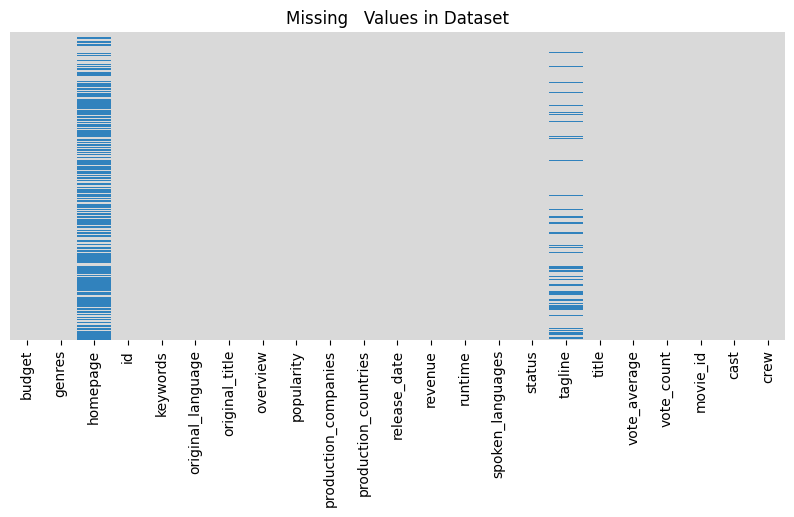

In [32]:
# Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(movies.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing   Values in Dataset')
plt.show()

#### **Check for dimensions shape for data**

In [33]:
movies.shape

(4809, 23)

#### **Check datatype of dataset**

In [34]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

#### **Selecting Specific Columns from the `movies` DataFrame**

The following code selects the `movie_id`, `title`, `overview`, `genres`, `keywords`, `cast`, and `crew` columns from the `movies` DataFrame.


movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [35]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### **Check the Missing Values**
To check for any missing values in the `movies` DataFrame, run the following code:


In [37]:
#Check the missing  value
movies.isnull().sum()


movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### **Check the Value of the `genres` Column in the First Movie Entry**
To examine the value in the `genres` column for the first movie entry in the `movies` DataFrame, use the following code:

In [38]:
#Check the value of Movies column  genres
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#### **Function to Convert String Representation of  Dictionaries two List**

This function takes a string that represents a list of dictionaries and extracts the values associated with the key `'name'`.

In [39]:
import ast
def convert(obj):
    """
    This function takes a string representation of a list of dictionaries,
    converts it into an actual list of dictionaries, and then extracts the 'name'
    field from each dictionary to create a list of names.

    Args:
        obj (str): A string representation of a list of dictionaries.

    Returns:
        list: A list containing the 'name' values from each dictionary.
    """
    List = []  # Create an empty list to store the names.

    # Convert the string representation of the list into an actual list of dictionaries.
    for i in ast.literal_eval(obj):
        # Extract the 'name' field from each dictionary and add it to the List.
        List.append(i['name'])

    # Return the list of names.
    return List


#### **Applying the Convert Function to the 'genres', 'keywords', and 'cast' Columns**

We will apply the `convert` function to each of the specified columns in the DataFrame to extract the `'name'` values from their string representations.

In [40]:
# Applying the convert function to the 'genres', 'keywords', and 'cast' columns
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)

In [41]:
# Print the specified columns from the DataFrame
print(movies[['genres', 'keywords', 'cast']])


                                             genres  \
0     [Action, Adventure, Fantasy, Science Fiction]   
1                      [Adventure, Fantasy, Action]   
2                        [Action, Adventure, Crime]   
3                  [Action, Crime, Drama, Thriller]   
4              [Action, Adventure, Science Fiction]   
...                                             ...   
4804                      [Action, Crime, Thriller]   
4805                              [Comedy, Romance]   
4806             [Comedy, Drama, Romance, TV Movie]   
4807                                             []   
4808                                  [Documentary]   

                                               keywords  \
0     [culture clash, future, space war, space colon...   
1     [ocean, drug abuse, exotic island, east india ...   
2     [spy, based on novel, secret agent, sequel, mi...   
3     [dc comics, crime fighter, terrorist, secret i...   
4     [based on novel, mars, medallion, spac

#### **Function to Fetch the Director's Name**

The following function takes a string representation of a list of dictionaries and extracts the name of the person whose job is 'Director'. It converts the string into an actual list of dictionaries and returns the director's name in a list.


In [42]:

def fetch_director(obj):
    """
    This function takes a string representation of a list of dictionaries,
    converts it into an actual list of dictionaries, and then extracts the 'name'
    of the person whose job is 'Director'.

    Args:
        obj (str): A string representation of a list of dictionaries.

    Returns:
        list: A list containing the name of the 'Director'. If no director is found, the list will be empty.
    """
    List = []  # Create an empty list to store the director's name.

    # Convert the string representation of the list into an actual list of dictionaries.
    for i in ast.literal_eval(obj):
        # Check if the 'job' field is 'Director'.
        if i['job'] == 'Director':
            List.append(i['name'])  # Add the director's name to the list.
            break  # Stop the loop after finding the director.

    # Return the list containing the director's name.
    return List


In [43]:
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]



#### **Function to Remove Spaces from Strings**

The following function takes a list of strings and removes all spaces from each string in the list.

In [44]:
def collapse(L):
    L1 = []  # Initialize an empty list to store the modified strings
    for i in L:  # Iterate through each string in the input list L
        L1.append(i.replace(" ", ""))  # Remove spaces from the string and append it to L1
    return L1  # Return the new list containing the modified strings


In [46]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [47]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


#### **Split the Words in the `overview` Column**
To transform each `overview` in the `movies` DataFrame into a list of individual words, run the following code:


In [53]:
movies['overview'] = movies['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


#### **Combine Multiple Columns to Create `tags`**
To create a new column `tags` by combining the `overview`, `genres`, `keywords`, `cast`, and `crew` columns in the `movies` DataFrame, use the following code:

```python

In [54]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

#### **Drop Unnecessary Columns and View the Updated DataFrame**
To create a new DataFrame without the `overview`, `genres`, `keywords`, `cast`, and `crew` columns, and to preview the first few rows, use the following code:


In [55]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


#### **Convert Lists in the `tags` Column to Strings**
To convert each list in the `tags` column of the `new` DataFrame into a single string of space-separated words, and then preview the updated DataFrame 

In [56]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


#### **Save the DataFrame to a CSV File**
To save the `new` DataFrame as a CSV file, specify the folder path where you want to store it. You can use either a relative or absolute path.


In [62]:
# Define the folder path where you want to save the file
# Change 'your_folder' to your desired folder path
folder_path = 'data/data_preprocessing.csv'  # Relative path
# or use an absolute path
# folder_path = '/path/to/your/folder/data_preprocessing.csv'  # Absolute path

# Save the DataFrame to a CSV file
new.to_csv(folder_path, index=False)  # index=False prevents writing row indices

print("DataFrame saved as data_preprocessing.csv in the specified folder.")

DataFrame saved as data_preprocessing.csv in the specified folder.
